In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split  # aaron said 80 20
import warnings
warnings.filterwarnings('ignore')


plt.style.use('ggplot')


df = pd.read_csv('ObesityDataSet.csv')



print(df.head())

X = df.drop(columns=['obese_category'])  # 'obesity_level' is target variable
y = df['obese_category']

# Splits the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train and y_train will contain 80% of the data for training
# X_test and y_test will contain 20% of the data for testing


   Gender  Age  Height  Weight family_history_with_overweight  \
0  Female   21    1.62      64                            yes   
1  Female   21    1.52      56                            yes   
2    Male   23    1.80      77                            yes   
3    Male   27    1.80      87                             no   
4    Male   22    1.78      90                             no   

  eat_high_caloric_food  eat_vegetables_frequency  main_meals_day  \
0                    no                         2               3   
1                    no                         3               3   
2                    no                         2               3   
3                    no                         3               3   
4                    no                         2               1   

  eat_between_meals smoke  water_day monitor_calories  exercise_frequency  \
0         Sometimes    no          2               no                   0   
1         Sometimes   yes          3    

In [47]:
parameter_names = df.columns.tolist()
print(parameter_names)


['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'eat_high_caloric_food', 'eat_vegetables_frequency', 'main_meals_day', 'eat_between_meals', 'smoke', 'water_day', 'monitor_calories', 'exercise_frequency', 'device_time', 'drink_alcohol', 'transport_mode', 'obese_category']


In [7]:
print(X.dtypes)

Gender                             object
Age                                 int64
Height                            float64
Weight                              int64
family_history_with_overweight     object
eat_high_caloric_food              object
eat_vegetables_frequency            int64
main_meals_day                      int64
eat_between_meals                  object
smoke                              object
water_day                           int64
monitor_calories                   object
exercise_frequency                  int64
device_time                         int64
drink_alcohol                      object
transport_mode                     object
dtype: object


In [12]:
X.isnull().sum() #to check for missing values, should be none for us



Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
eat_high_caloric_food             0
eat_vegetables_frequency          0
main_meals_day                    0
eat_between_meals                 0
smoke                             0
water_day                         0
monitor_calories                  0
exercise_frequency                0
device_time                       0
drink_alcohol                     0
transport_mode                    0
dtype: int64

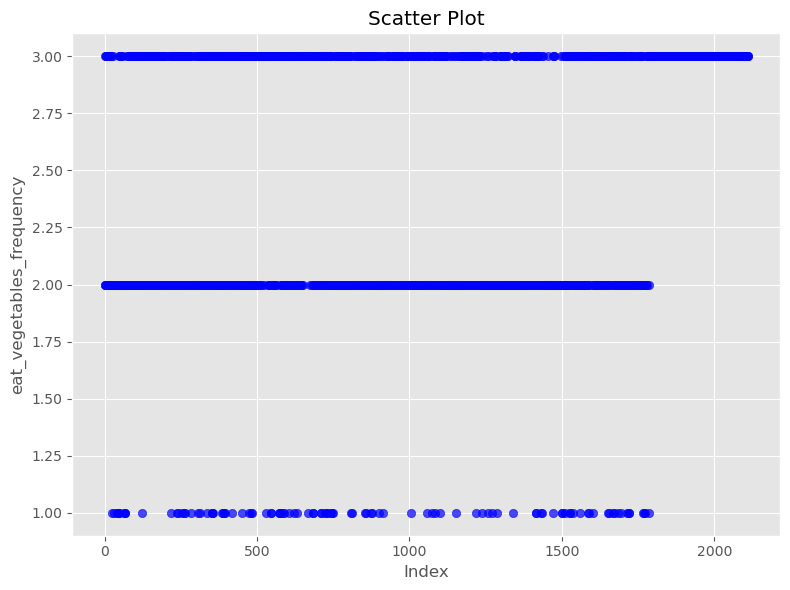

In [35]:
columns = X.columns
col = 'eat_vegetables_frequency'

fig, ax = plt.subplots(figsize=(8, 6))

# Plot 'Age' column as a dot chart
ax.scatter(df.index, df[col], color='blue', alpha=0.7)

# Set plot title and labels
ax.set_title('Scatter Plot')
ax.set_xlabel('Index')
ax.set_ylabel(col)

# Show the plot
plt.tight_layout()
plt.show()